# Student Score Prediction

Objective: Predict a students final exam score based on study-related factors.

## 1. Data Understanding


In [4]:
import pandas as pd

# Optional: nicer tables
pd.set_option('display.max_columns', None)


In [5]:
# Load the CSV into a DataFrame
df = pd.read_csv("StudentPerformanceFactors.csv")  # Make sure the file is in the same folder as your notebook

# Show the first 5 rows
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [6]:
# Shape of dataset (rows, columns)
print("Shape:", df.shape)

# Data types and non-null counts
df.info()

# Summary statistics
df.describe()


Shape: (6607, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              66

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
# Missing values in each column
print(df.isnull().sum())

# Count duplicates
print("Duplicate rows:", df.duplicated().sum())


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
Duplicate rows: 0


In [8]:
# Check data types again
df.dtypes

# See first few rows just to understand what columns mean
df.head()



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [9]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [9]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [10]:
# Target variable
y = df['Exam_Score']

# Features (all except target)
X = df.drop(columns=['Exam_Score'])

In [11]:
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['Parental_Involvement', 'Access_to_Resources',
       'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Learning_Disabilities', 'Parental_Education_Level',
       'Distance_from_Home', 'Gender'],
      dtype='object')

In [12]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_Yes,Motivation_Level_Low,Motivation_Level_Medium,Internet_Access_Yes,Family_Income_Low,Family_Income_Medium,Teacher_Quality_Low,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,True,False,False,False,False,True,False,True,True,False,False,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,True,False,False,True,False,True,False,True,False,True,False,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,False,True,False,True,True,False,True,True,False,True,False,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,True,False,False,True,True,False,True,True,False,True,False,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,False,True,False,True,True,False,True,True,False,True,False,False,True,True,False,False,False,False,False,True,False


In [14]:
!pip install matplotlib seaborn

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.1 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.1 MB 1.0 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.1 MB 1.2 MB/s eta 0:00:07
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   ------ --------------------------------- 1.3/8.1 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 1.8/8.1 MB 1.1 MB/s eta 0:00:06
   ---------- ----------------------------- 2.1/8.1 MB 1.1 MB/s eta 0:00:06
   ----------- ---------------------------- 2.4/8.1 MB 1.1 MB/s eta 0:00:06
   ------------ --------------------------- 2.6/8.1 MB 1.1 MB/s eta 0:00:05
   -------------- ---------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Low'

<Figure size 1200x800 with 0 Axes>

In [ ]:
# Sort correlations with Exam_Score
correlations = df.corr()['Exam_Score'].sort_values(ascending=False)
print(correlations)

In [18]:
df_encoded = pd.get_dummies(df, drop_first=True)

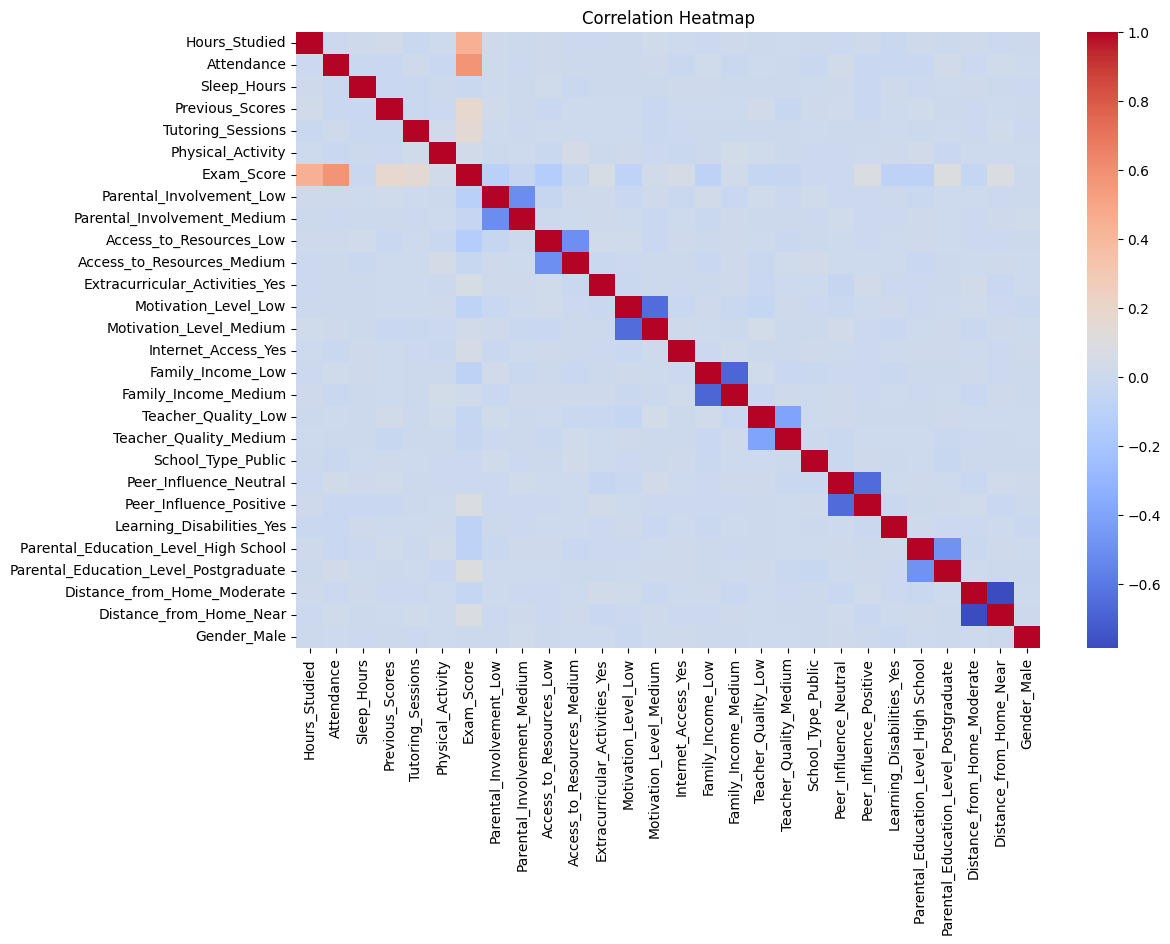

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
correlations = df_encoded.corr()['Exam_Score'].sort_values(ascending=False)
print(correlations)

Exam_Score                               1.000000
Attendance                               0.581072
Hours_Studied                            0.445455
Previous_Scores                          0.175079
Tutoring_Sessions                        0.156525
Parental_Education_Level_Postgraduate    0.093764
Distance_from_Home_Near                  0.084870
Peer_Influence_Positive                  0.081217
Extracurricular_Activities_Yes           0.064382
Internet_Access_Yes                      0.051475
Physical_Activity                        0.027824
Motivation_Level_Medium                  0.024771
Family_Income_Medium                     0.020995
Gender_Male                             -0.002032
Peer_Influence_Neutral                  -0.007795
School_Type_Public                      -0.008844
Sleep_Hours                             -0.017022
Access_to_Resources_Medium              -0.026158
Parental_Involvement_Medium             -0.035978
Teacher_Quality_Medium                  -0.039294


In [21]:
X = df_encoded.drop(columns=['Exam_Score'])
y = df_encoded['Exam_Score']

In [22]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop(columns=['Exam_Score'])
y = df_encoded['Exam_Score']

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (5285, 27)
Test shape: (1322, 27)


In [23]:
from sklearn.linear_model import LinearRegression

# Create model
lr = LinearRegression()

# Train on training data
lr.fit(X_train, y_train)


LinearRegression()

In [24]:
y_pred = lr.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.7696017567194432
RMSE: 1.8046317813990214
MAE: 0.45028541547009326


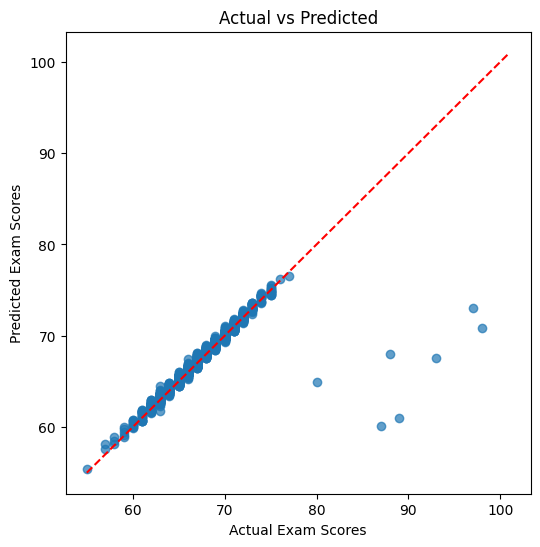

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()

Polynomial R²: 0.7473427195932723
Polynomial RMSE: 1.8897960126411184
Polynomial MAE: 0.6378683055292617


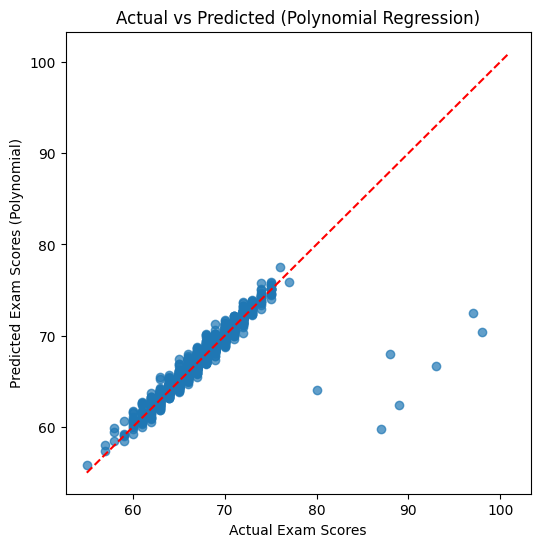

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Create a pipeline with polynomial features + linear regression
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),  # you can try degree=3 later
    ('linear', LinearRegression())
])

# Train
poly_model.fit(X_train, y_train)

# Predict
y_poly_pred = poly_model.predict(X_test)

# Evaluate
print("Polynomial R²:", r2_score(y_test, y_poly_pred))
print("Polynomial RMSE:", np.sqrt(mean_squared_error(y_test, y_poly_pred)))
print("Polynomial MAE:", mean_absolute_error(y_test, y_poly_pred))

# Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_poly_pred, alpha=0.7)
plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores (Polynomial)")
plt.title("Actual vs Predicted (Polynomial Regression)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


In [28]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_rf_pred))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_rf_pred)))


Random Forest R²: 0.6479691096210922
Random Forest RMSE: 2.2306909575869565


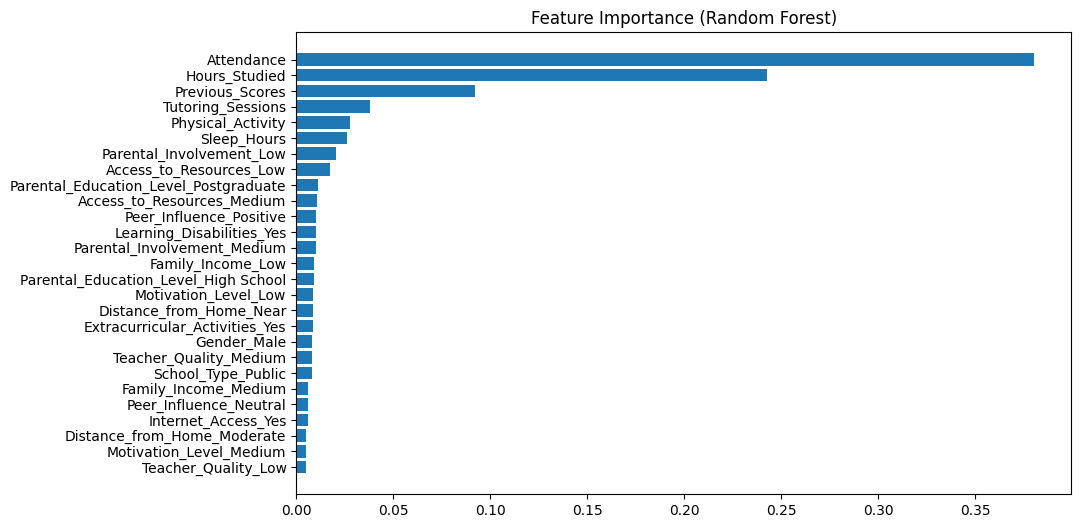

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.show()
